In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [27]:
df1 = pd.read_csv('FluViewPhase8_Season57-56-55_Data.csv')


In [28]:
## Data Cleaning  
#df1['ACTIVITY LEVEL'] = df1['ACTIVITY LEVEL'].str.replace('Level', '')
df1['SEASON'] = df1['SEASON'].str.replace('2017-18', '2017')
df1['SEASON'] = df1['SEASON'].str.replace('2015-16', '2015')
df1['SEASON'] = df1['SEASON'].str.replace('2016-17', '2016')
df1['ACTIVITY LEVEL'] = df1['ACTIVITY LEVEL'].astype('int')

df1.head()

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
0,Alabama,0,No Activity,Oct-10-2015,40,2015
1,Alabama,0,No Activity,Oct-17-2015,41,2015
2,Alabama,1,Local Activity,Oct-24-2015,42,2015
3,Alabama,2,Sporadic,Oct-31-2015,43,2015
4,Alabama,2,Sporadic,Nov-07-2015,44,2015


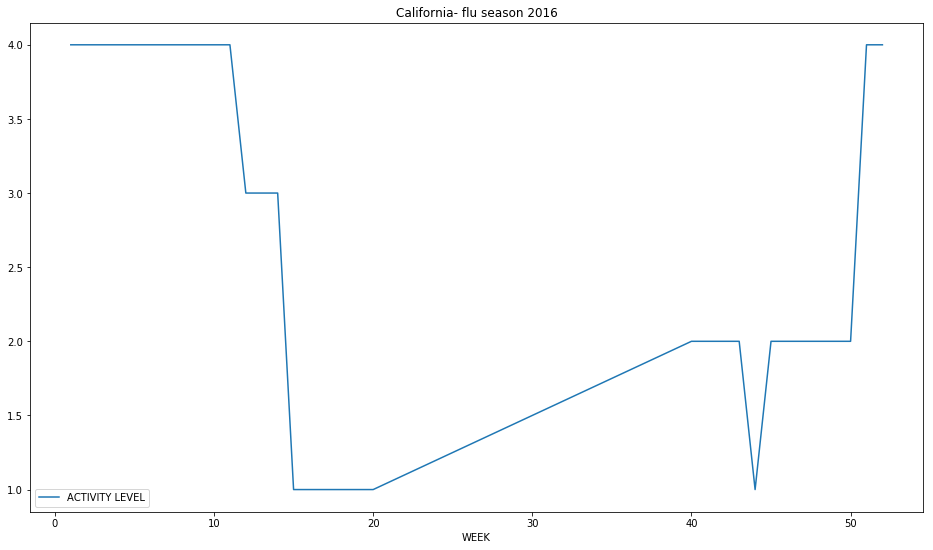

In [29]:

df2 = df1.drop(['ACTIVITY LEVEL LABEL', 'WEEKEND'], axis=1)

df2015 = df2.loc[df2['SEASON'] == '2015']
df2016 = df2.loc[df2['SEASON'] == '2016']
df2017 = df2.loc[df2['SEASON'] == '2017']

df_Alabama = df2016[df2016['STATENAME'] == 'Alabama'].sort_values(by=['WEEK'])
#df_Alabama = df2016[df2016['STATENAME'] == 'Alabama'].drop('STATENAME',axis =1 )
#df_Alabama.plot(x='WEEK', y='ACTIVITY LEVEL', title='Alabama')

df_California = df2016[df2016['STATENAME'] == 'California'].sort_values(by=['WEEK'])
plt.rcParams["figure.figsize"] = [16,9]
df_California.plot(x='WEEK', y='ACTIVITY LEVEL', title='California- flu season 2016')

df_NewYork= df2016[df2016['STATENAME'] == 'New York'].sort_values(by=['WEEK'])
df_Texas = df2016[df2016['STATENAME'] == 'Texas'].sort_values(by=['WEEK'])
df_Florida = df2016[df2016['STATENAME'] == 'Florida'].sort_values(by=['WEEK'])

df4states = pd.merge(df_California, df_NewYork, on='WEEK', how='inner')
df4states = df4states.merge(df_Texas, on='WEEK', how='inner')
df4states = df4states.merge(df_Texas, on='WEEK', how='inner')
df4states = df4states.merge(df_Florida, on='WEEK', how='inner')

x = list(df_California['WEEK'])
y = list(df_California['ACTIVITY LEVEL'])
z = list(df_NewYork['ACTIVITY LEVEL'])
k = list(df_Texas['ACTIVITY LEVEL'])
l = list(df_Florida['ACTIVITY LEVEL'])



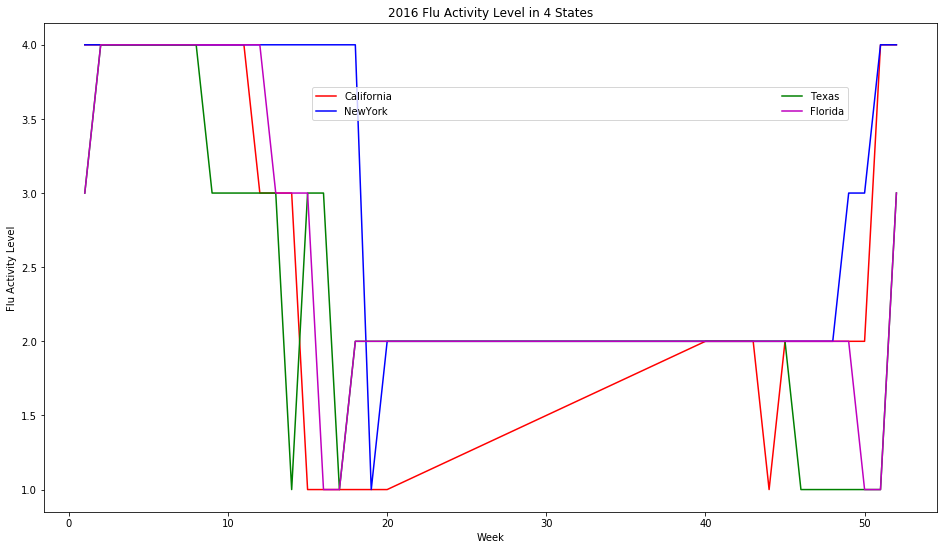

[datetime.datetime(2016, 1, 31, 0, 0), datetime.datetime(2016, 2, 29, 0, 0), datetime.datetime(2016, 3, 31, 0, 0), datetime.datetime(2016, 4, 30, 0, 0), datetime.datetime(2016, 5, 31, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2016, 7, 31, 0, 0), datetime.datetime(2016, 8, 31, 0, 0), datetime.datetime(2016, 9, 30, 0, 0), datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 11, 30, 0, 0), datetime.datetime(2016, 12, 31, 0, 0), datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 2, 28, 0, 0), datetime.datetime(2017, 3, 31, 0, 0), datetime.datetime(2017, 4, 30, 0, 0), datetime.datetime(2017, 5, 31, 0, 0), datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2017, 7, 31, 0, 0), datetime.datetime(2017, 8, 31, 0, 0)]


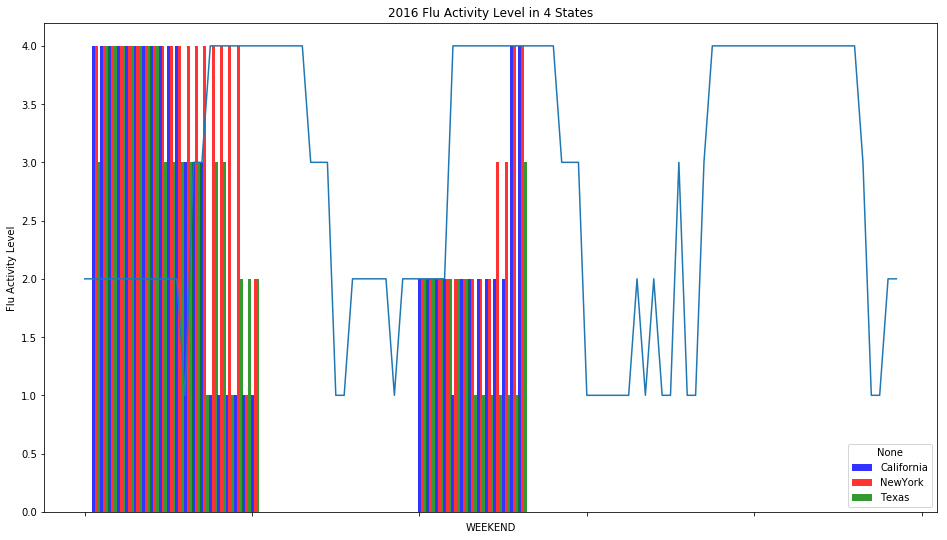

In [30]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('2016 Flu Activity Level in 4 States')
ax.set_xlabel('Week')
ax.set_ylabel('Flu Activity Level')

plt.plot(x, y, 'r', label = 'California')
plt.plot(x, z, 'b',label = 'NewYork')
plt.plot(x, k, 'g',label = 'Texas')
plt.plot(x,l,'m',label = 'Florida')      
plt.legend(bbox_to_anchor=(0.3, 0.8, 0.6, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

#bar1 = plt.bar(x,y,color='red')
#bar2 = plt.bar(x,z,color='blue')

#fig.show()
#plt.plot(df2015['WEEK'],df2015['ACTIVITY LEVEL'])
#plt.plot(df2016['WEEK'],df2016['ACTIVITY LEVEL'])

###########################################################
###########################################################
# bar plot
fig, ax = plt.subplots()
ax.set_title('2016 Flu Activity Level in 4 States')
ax.set_xlabel('Week')
ax.set_ylabel('Flu Activity Level')

xfloat = [float(i) for i in x]
xfloat = np.array(x)
yfloat = np.array(y)
zfloat = np.array(z)
index = xfloat
bar_width = 0.35
opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, y, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='California')

rects2 = plt.bar(xfloat + bar_width, zfloat, bar_width,
                 alpha=opacity,
                 color='r',
                 label='NewYork')


rects2 = plt.bar(xfloat + 2*bar_width, k, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Texas')

plt.legend(bbox_to_anchor=(0.3, 0.8, 0.6, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
fig.show()
###########################################################
###########################################################


df_Cal = df1.loc[df1['STATENAME'] == 'California']
df_Cal
df_Cal.drop('ACTIVITY LEVEL LABEL', axis =1 )
df_Cal.set_index('WEEKEND')

# Eg. time series plot
#ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
#ts = ts.cumsum()
#ts.plot()

ts = pd.Series(df_Cal['ACTIVITY LEVEL'].values, index=df_Cal['WEEKEND'])
ts.plot()

df_Cal['Mycol'] =  pd.to_datetime(df_Cal['WEEKEND'])
ts = pd.Series(df_Cal['ACTIVITY LEVEL'].values, index=df_Cal['Mycol'])

ar_model = sm.tsa.AR(ts, freq=None)
pandas_ar_res = ar_model.fit(maxlag=9, method='mle', disp=-1)

from datetime import datetime
dates = sm.tsa.datetools.dates_from_range('2016m1', length=20)
print(dates)

ar_model = sm.tsa.AR(ts, dates=dates)
ar_res = ar_model.fit(maxlag=9, method='mle', disp=-1)



In [31]:
pred = ar_res.predict()
pred.head()

2016-01-31    2.791708
2016-02-29    2.139310
2016-03-31    2.132402
2016-04-30    2.120521
2016-05-31    2.141727
Freq: M, dtype: float64

Text(0,0.5,'Flu Activity Level')

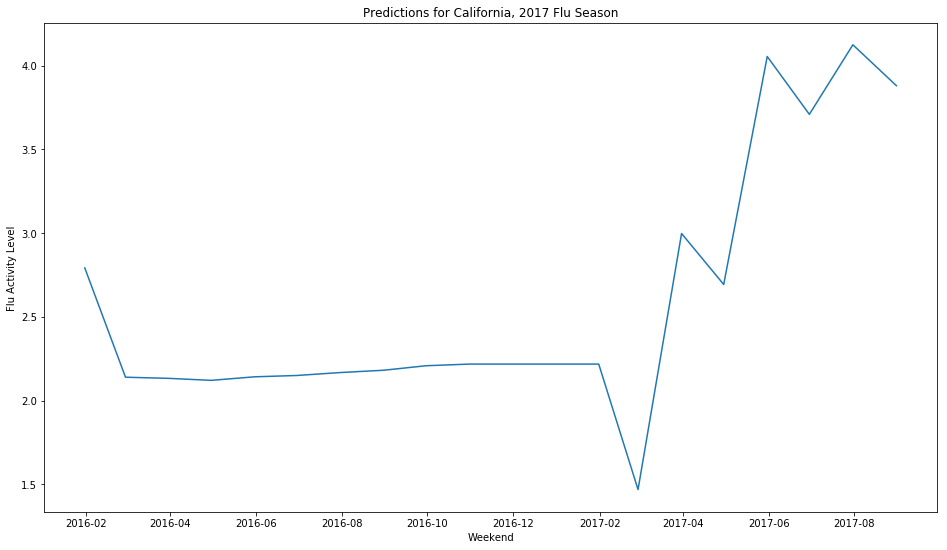

In [32]:
plt.plot(pred)
plt.title("Predictions for California, 2017 Flu Season")
plt.xlabel("Weekend")
plt.ylabel("Flu Activity Level")